# Classic linear SVM classifier

In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pydicom


C:\Users\paulr\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [4]:
## Model 

%matplotlib inline
import numpy as np
import os 
import cv2
import matplotlib.pyplot as plt

CATEGORIES=['MALIGNANT','BENIGN']
datadir=r"D:\Other\IFN646_Project\mixed_dataset" # The dataset contain cropped and non-cropped images

IMG_SIZE = 120  # Common size of all images

training_data=[]

for category in CATEGORIES:
    path=os.path.join(datadir, category)
    class_num=CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array=cv2.imread(os.path.join(path,img))
            new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,class_num])
        except Exception as e:
            pass    

print('Number of images : ' + str(len(training_data)))

## Create input variables
X = []  
y = []  
for image, label in training_data:
    X.append(image)
    y.append(label)
    
X = np.array(X).reshape(len(training_data),-1)

print("Vector X :" + str(X.shape))
# Normalize the images
X = X/255.0


Number of images : 373
Vector X :(373, 43200)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')  
svc.fit(X_train, y_train)

y = svc.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Accuracy on unknown data is", classification_report(y_test,y))

print("Accuracy on data is", accuracy_score(y_test, y))


Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.68      0.49      0.57        39
           1       0.57      0.75      0.65        36

    accuracy                           0.61        75
   macro avg       0.63      0.62      0.61        75
weighted avg       0.63      0.61      0.61        75

Accuracy on data is 0.6133333333333333


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


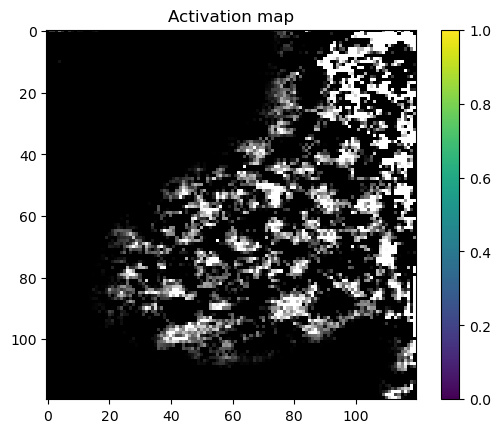

In [6]:
## Visualise results and interprete SVM

# One image as example
original_image = cv2.imread("D:\\Other\\IFN646_Project\\mixed_dataset\\MALIGNANT\\251.jpg")

resized_image = cv2.resize(original_image, (IMG_SIZE, IMG_SIZE))

# reshape the image to fit the model
image_features = resized_image.reshape(1, -1)

# Get weights
svm_weights = svc.coef_[0]

# Applaying weight
activation_map = image_features * svm_weights

# Applying a threshold
# threshold = np.percentile(activation_map, 10) 

activation_map = activation_map.reshape(IMG_SIZE, IMG_SIZE, 3)

# activation map 
plt.imshow(activation_map, cmap='viridis')
plt.title('Activation map')
plt.colorbar()
plt.show()



As the model is not accurate, the activation map here for a MALIGNANT image shows that the model is not able to identify specific regions.